In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr libtesseract-dev tesseract-ocr-ara  # Installe Tesseract + arabe
!pip install pytesseract Pillow

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 129 kB in 1s (102 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
35 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **tesseract**

# **tous pour les extrait de naissance **

 5 image(s) trouvée(s).


 Traitement : ex-Massine.jpg
   ➤ Angle détecté : -1.00°
   ➤ Rotation appliquée.
    Texte OCR sauvegardé.


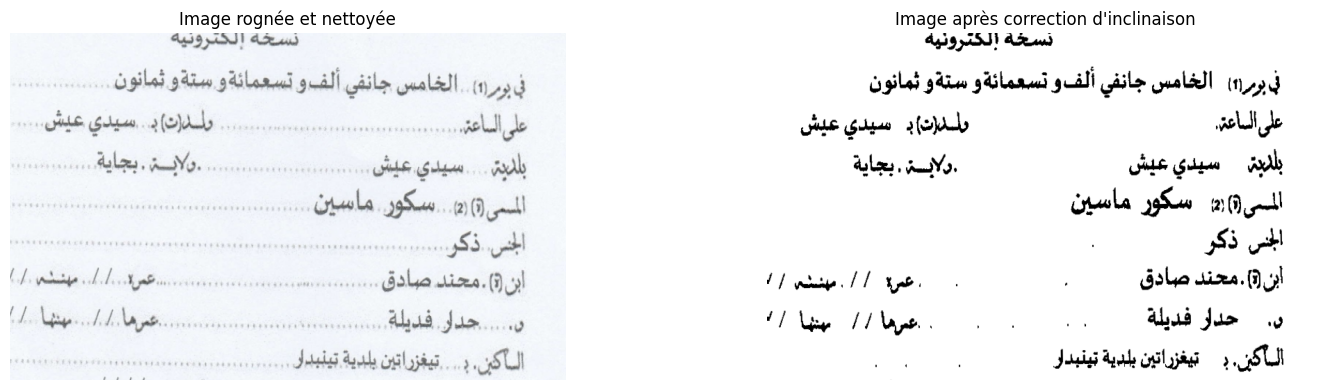

** Texte OCR pour `ex-Massine.jpg` :**

```
نسحة الخبرونية
يبري الخامس جانفي ألف و تسعمائةو سستةو ثمانون

على الساعق, للإن)ب سيدي عيش
بللبت سيدي عيش .«لابسن. بجاية

المسى )6 سكور ماسين

الس ذكو

أبن ).محند صادق . ‎٠‏ اعمرة //2.مبنطم //
ب. حدار فديلة 00 . ‎٠.‏ .نسرها// بهنها /'
الأكين, ب تيغزراتين بلدية تينبدار
```


 Traitement : ex-Sadek.jpg
   ➤ Angle détecté : 0.00°
   ➤ Rotation non nécessaire.
    Texte OCR sauvegardé.


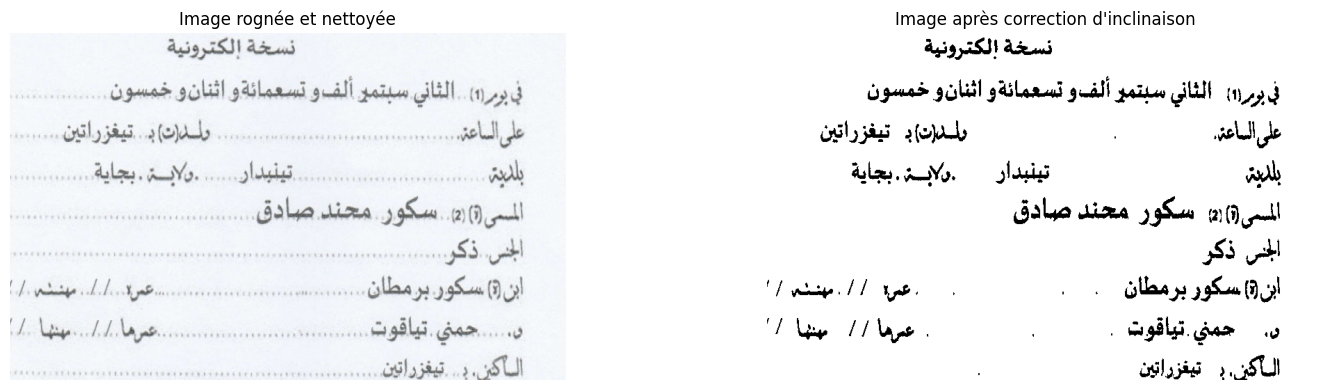

** Texte OCR pour `ex-Sadek.jpg` :**

```
نسخة الكترونية
يبر الثاني سبتمو ألفو تسعمائةو اثنانو خمسون

على الساعق. . بلدإن)ب تيغزراتين
بللين تينبدار ««الانست .بجاية

المسسن )8 سكور محند صادق
امس ذكر

ابن سكور برمطان ‎٠.‏ . .عس؟ //.مينشم /'
د. جمني تياقوت ‎٠‏ 200 عرها // ينها /

الأكئ.د تيغزراتين
```


 Traitement : ex-manel.jpg
   ➤ Angle détecté : -3.00°
   ➤ Rotation appliquée.
    Texte OCR sauvegardé.


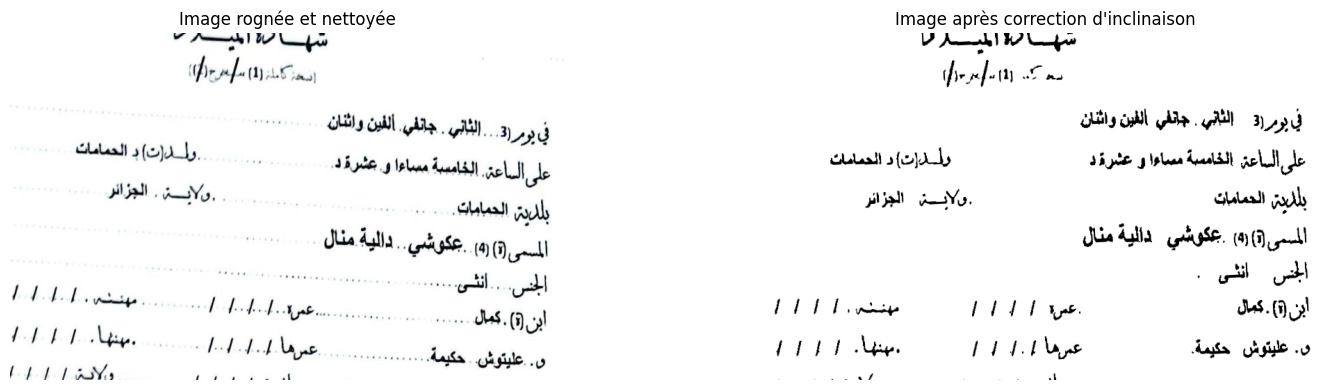

** Texte OCR pour `ex-manel.jpg` :**

```
سهاءعةا لمم ما

سم > (3ا لسر ا

في برمرة الثاني . جانفي الفين واثنان

على الساعن الخاممبة مساواو عشرةد رلدإت)د الحمامات
لين الحمامات .لابن الجزائر

المسمى (3)() .عكوشي دالية منال

لجس انلى .

ابن (5). كمال عسة |1 /// مينطي. / / / /
ى. عليتوش حكيمة. عبرها /./ / / سبنها. ////
```


 Traitement : ex-nesrine.jpg
   ➤ Angle détecté : 0.00°
   ➤ Rotation non nécessaire.
    Texte OCR sauvegardé.


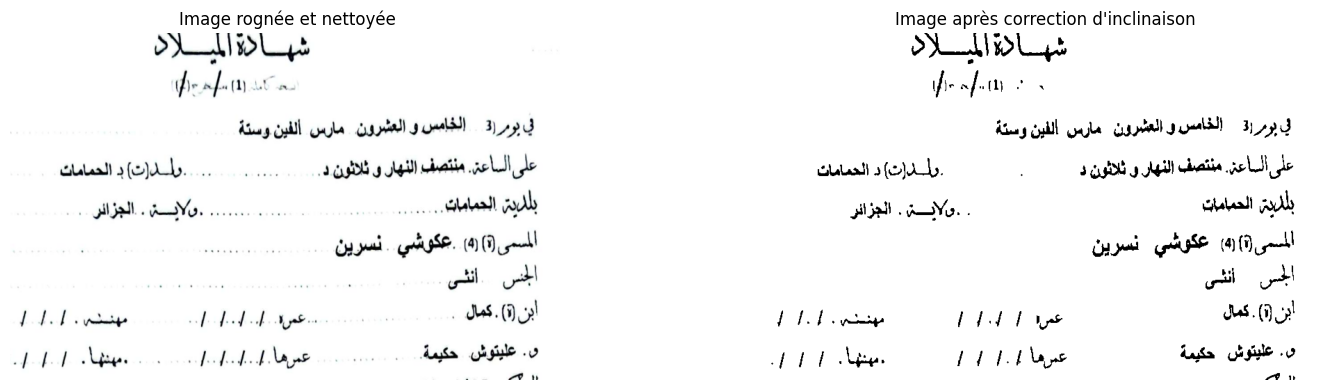

** Texte OCR pour `ex-nesrine.jpg` :**

```
شماة"! ايلام
00-5 للم ا

ف برمرة الخامس و العشرون مارس ألفين وسئة

على الساعن. منتصف النهار و ثلاثون د . .يلدإت)د الحمامات

بلي الحمامات ‎٠‏ .ولانسم . الجزائر

المممى (4()7) عكوشي نسرين

الم انلى

أبن 3). كمال عس / /./ / ميلم /./ /
د . علبتوش حكيمة عيرها /./ / / .مينها. / / /.

لا
```


 Traitement : ex-younes.jpg
   ➤ Angle détecté : 0.00°
   ➤ Rotation non nécessaire.
    Texte OCR sauvegardé.


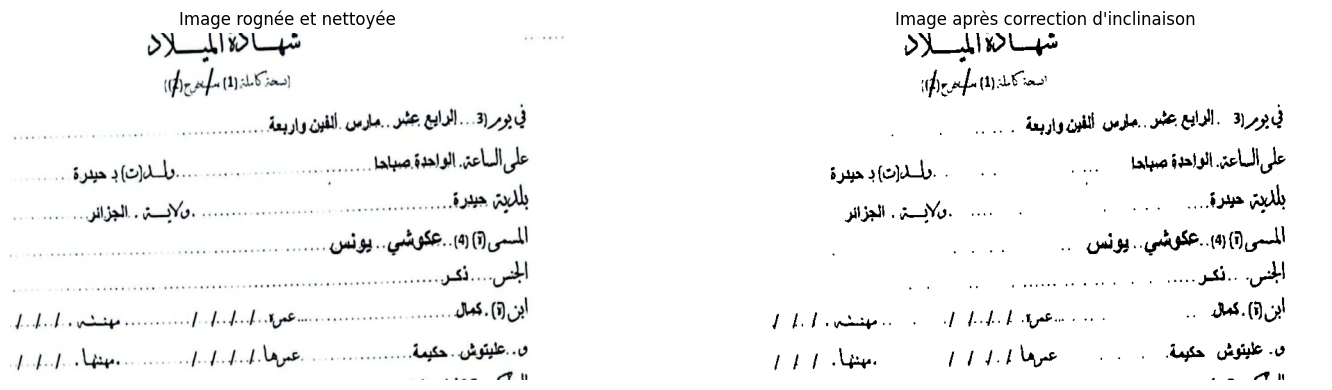

** Texte OCR pour `ex-younes.jpg` :**

```
سهياملةا لييارم
امحة ال (1) مجم

في برمرلة . الرايع عثسر..مارس الفين واربعة .

على الساعن. الواحدة صباحا ‎٠‏ دلذزت)ب حيدرة

ليخ حيرة... . ‎٠‏ .لانت . الجزائر

المسى 00 .عكوشي.. يونس .

أبن 0) .كم 0 اسسعص! 47م 7 ا الل مهنطس. /./ /
د.عليتوش حكيمة. . ‎٠.٠.‏ عهام / // .مينها. / / /
```

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
from glob import glob

from IPython.display import display, Markdown

# === PARAMÈTRES GÉNÉRAUX ===
image_dir = "/content/drive/MyDrive/our mini BDD"  # Dossier contenant les images
output_dir = "resultats_ocr"
tesseract_cmd = "/usr/bin/tesseract"  # Adapter si besoin
pytesseract.pytesseract.tesseract_cmd = tesseract_cmd

os.makedirs(output_dir, exist_ok=True)

# === FONCTIONS ===

def get_skew_angle(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    edges = cv2.Canny(thresh, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=150)
    if lines is None:
        return 0.0
    angles = []
    for line in lines:
        rho, theta = line[0]
        angle = 90 - (theta * 180 / np.pi)
        if -45 < angle < 45:
            angles.append(angle)
    return np.median(angles) if angles else 0.0

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

def process_image(image_path):
    filename = os.path.basename(image_path)
    print(f"\n Traitement : {filename}")

    # === 1. Chargement et rognage ===
    img = cv2.imread(image_path)
    if img is None:
        print(" Image introuvable.")
        return

    h, w, _ = img.shape
    x = int(w * 0.18)
    y = int(h * 0.18)
    crop_w = int(w * 0.6)
    crop_h = int(h * 0.23)
    cropped = img[y:y+crop_h, x:x+crop_w]
    resized = cv2.resize(cropped, (800, 500), interpolation=cv2.INTER_AREA)

    # === 2. Nettoyage ===
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = 255 - thresh
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) < 2:
            cv2.drawContours(thresh, [cnt], 0, 0, -1)
    cleaned = 255 - thresh

    # === 3. Correction d'inclinaison ===
    cleaned_color = cv2.cvtColor(cleaned, cv2.COLOR_GRAY2BGR)
    angle = get_skew_angle(cleaned_color)
    print(f"   ➤ Angle détecté : {angle:.2f}°")
    if abs(angle) > 0.5:
        rotated = rotate_image(cleaned_color, -angle)
        print("   ➤ Rotation appliquée.")
    else:
        rotated = cleaned_color
        print("   ➤ Rotation non nécessaire.")

    # === 4. OCR arabe ===
    pil_img = Image.fromarray(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    text = pytesseract.image_to_string(pil_img, lang='ara')

    # === 5. Sauvegarde texte ===
    base_name = os.path.splitext(filename)[0]
    output_txt = os.path.join(output_dir, f"{base_name}_ocr.txt")
    with open(output_txt, "w", encoding="utf-8") as f:
        f.write(text.strip() + "\n")

    print("    Texte OCR sauvegardé.")

    # === 6. Affichages ===
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title("Image rognée et nettoyée")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.title("Image après correction d'inclinaison")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    display(Markdown(f"** Texte OCR pour `{filename}` :**\n\n```\n{text.strip()}\n```"))

# === BOUCLE ===

image_paths = sorted(glob(os.path.join(image_dir, "ex-*.jpg")))
if not image_paths:
    print(" Aucune image trouvée avec le préfixe 'ex-'.")
else:
    print(f" {len(image_paths)} image(s) trouvée(s).\n")
    for img_path in image_paths:
        process_image(img_path)


In [ ]:
!pip show pytesseract

Name: pytesseract
Version: 0.3.13
Summary: Python-tesseract is a python wrapper for Google's Tesseract-OCR
Home-page: https://github.com/madmaze/pytesseract
Author: Samuel Hoffstaetter
Author-email: samuel@hoffstaetter.com
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: packaging, Pillow
Required-by: 


# **Residance**

 5 image(s) trouvée(s).


 Traitement : re-Aghilas.jpg
Angle détecté : 0.00°
Rotation non nécessaire.
    Texte OCR sauvegardé.


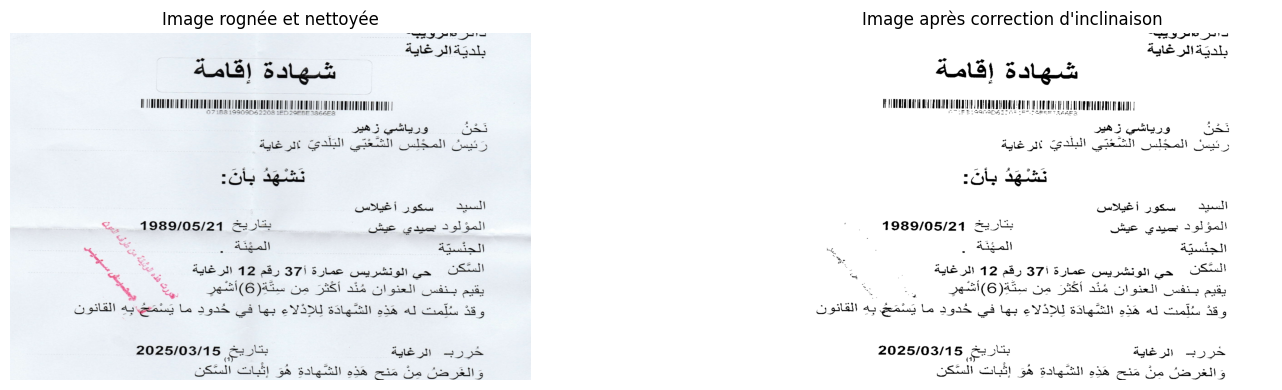

** Texte OCR pour `re-Aghilas.jpg` :**

```
ل لس اش اسل ام

بلديّة الر غاية
.و هي بوب
شهادة إقامة
اذا اللماماام1 !انا السساملاا! !! الل لالط
تَحْنٌ ورياشي ز هير

رئيمن المجلس الشتغبّي البلديَ الرغاية

© امة

السيد سكور أغيلاس

الجنسيّة المهنة
الستكن | حي الونشريس عمارة |37 رقم 12 الرغاية .| 0
يقيم بنفس ينفس العنوان هند أكْثْرَ مِن ستّة( 6) أتتهر

وقد مثلمت له هذه التتهادة للاذلاء بها في خدودٍ ما يُسْمَحُ به القانون

خررب الرغاية بتار يخ 2025/03/15

وَالغرضن من مَنح هَذِهِ الشتّهادة هْوَ إثبات الستّكن
```


 Traitement : re-kamel.jpg
Angle détecté : 0.00°
Rotation non nécessaire.
    Texte OCR sauvegardé.


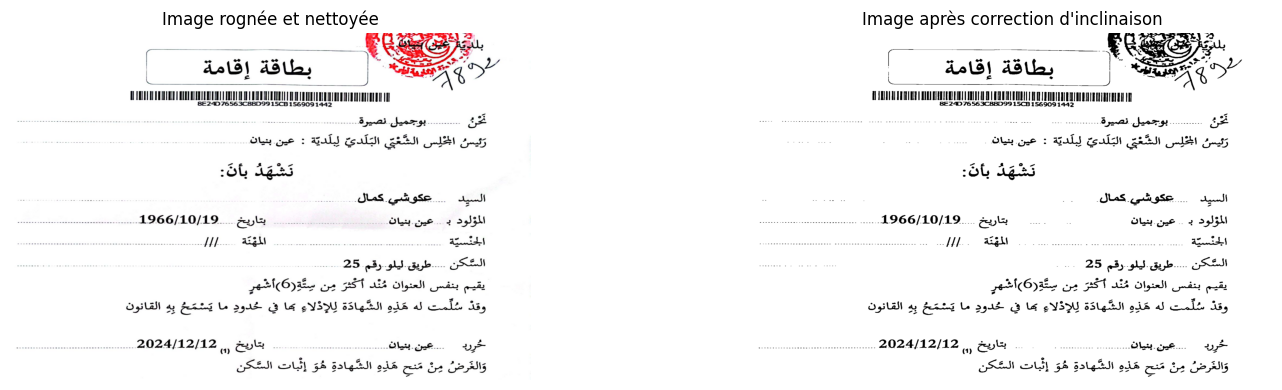

** Texte OCR pour `re-kamel.jpg` :**

```
8 ِ : :

||| !!!ااا الا]ًااا! ااال !ااا ااا ال! ااا اللا ال! 0 | اانا ! لاالاًا لاا لآلا ألآالا أ ااا للاالا
2 155909 15058 381810959 56 21-2834276

235527 0 بطاقة إقامة 1

3 يوجميل. نصيرة للم ممم الل 1 ممه لمعيه مد مم ممممه ممم ممم مام ممم ممه ممعم ممه ممم ممه مم ممم ممه ممه ممع ممعم
يسن اميلس الشَّعْق الجلّدئ لِيلّديّة : عين. بنيات
© ار عي 0
السيد ... عكوشي. كمال
المؤلود ب .. عين.بتيات 00 يتاريخ ..... 10/19/© 96 الأك.عه مس م م ا
اتسمهّة ...ا ااا ال ل ل 000000 الطههتة ../// 0
المككن .....طريق ليلو رقم 25

سم 7 . .عع 0 2 7
9 2 من

 

 

 

خُرره 2 عين بنيات..-----2020-. بتاريخ رى 2024/12/12 م

وَالكَرضٌ مِنْ مَنح هَذْهٍ الشلّهادةٍ هُوَ إِنّيات الككن
```


 Traitement : re-manel.jpg
Angle détecté : 0.00°
Rotation non nécessaire.
    Texte OCR sauvegardé.


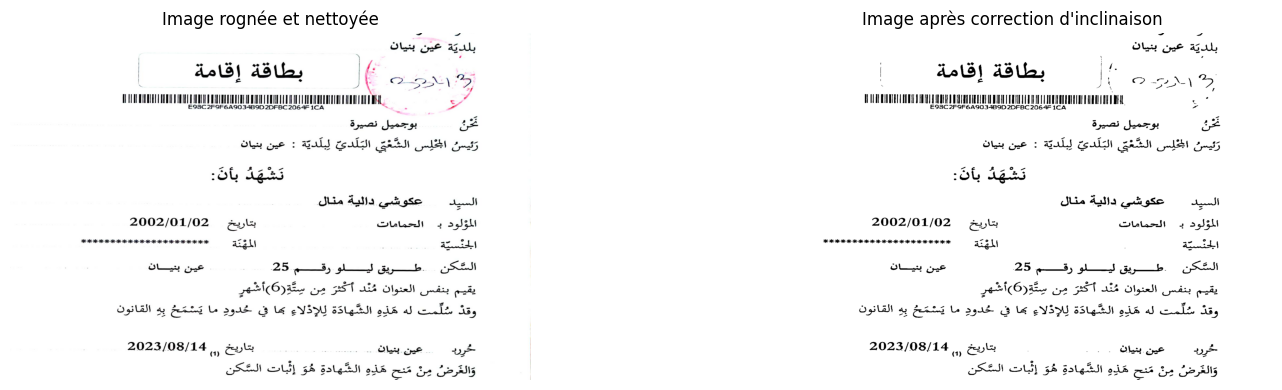

** Texte OCR pour `re-manel.jpg` :**

```
_7-_ 7
بلديّة عين بنيات
ا

ظ قة إقامة 00
دنرييه ا بطاقة إقامة ْ
؟ الملل

حنٌ بوجميل نصيرة
رئيسئ اليس الشّعْي البَلّدي لِبلّديّة : عين بنيان

 

هم عير

نشهد بأت :

7/١

السسيد عكوشي دالية مثال

المؤلود ب الحمامات بتاريخ ‏ 2002/01/02
‎١١ 00 5 ١‏ 2 3 عبد عإد >إد عاد عإد عإد عإد عإد علد عإد عإد عاد هد عإد جإد جل عإد عإد >إد جد عإد 4د

المككن .طلريق ليلو رقم 25 عين بنيات
يقيم بنفس العنوان مُند أكثرٌ مِن سِثَةِ0)أشهر
وقث سُلّمت له هَذَِهٍ الشّهادّة لِلإدْلاءٍ بما في حُدود ما يَسْمَحُ به القانون

خُررب ‎0١‏ عين بنياك 2080 ظ بتاريخ إى 2023/08/14

-_

وَالعَرضٌ مِنْ منح هَدْهٍ الشَّهادَةَ هُوَ إِثّيات السّكن
```


 Traitement : re-yasmine.jpg
Angle détecté : 0.00°
Rotation non nécessaire.
    Texte OCR sauvegardé.


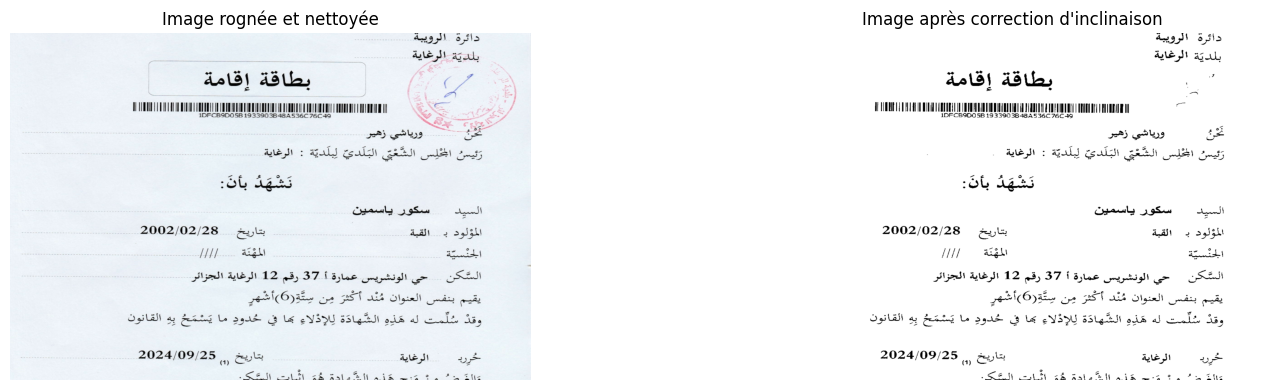

** Texte OCR pour `re-yasmine.jpg` :**

```
دائرة الرويبة
بلديّة الرغاية

| || 1|اآا ااا | ااا | اا لاا ال !للا ااا الا الاااالااا ملا ااملخمامانامماااممام مما اا الال
ود 76 مكضدكم 5ت 356 3910 3 159 5ك روطت 11
ححنٌ ورياشي زهير
رَئيسئ المْخُيِس الشّعْيَ البَلّدي لِلّديّة : الرغاية

0
6

السيد سكور ياسمين

المؤلود ب القبة بتاريخ ‏ 2002/02/28
المرّسبّة المهّتة ‏ ////

المتكن60ح- حي الونشريس عمارة أ 37 رقم 12 الرغاية الجزائر
يقيم بنفس العنوان مُند أكثرٌ من سِتَّة(0)أشهر
وقد سُلّمت له هَذْهٍ الشّهادَة لِلإذْلاءٍ بما في دود ما يَسْمَحٌ به القانون

خُررب الرغاية بتاريخ زو 0/5 ‎٠‏ ه22
```


 Traitement : re-younes.jpg
Angle détecté : 0.00°
Rotation non nécessaire.
    Texte OCR sauvegardé.


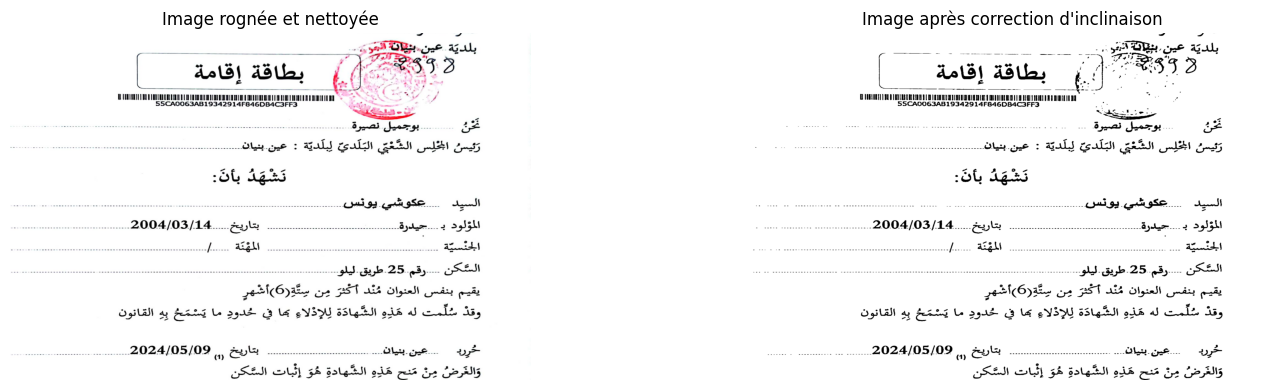

** Texte OCR pour `re-younes.jpg` :**

```
ل ....يبوجميل نصيرة. ... 00 للم ا لل لمعه م ع ممه لل سس لع لمعيه

الخنسيّة للطْههنّة / ل
يقيم ينفس العنوان مُئد أكثْرَ من سِنَّة(6)أشهر
وقد سُلّمت له هَذِهٍ الشّهادّة للإذلاء بما في خُدودٍ ما يَسْمَحُ يه القانون

خررب ‏ ..عين.بتيات ع 000( بتاريخ رى 5/09 .-.

0-7

وَالكَرضٌ مِنْ منح هَذْهٍ الشّهادةٍ هُوَ إِثْبيات الككن
```

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
from glob import glob

from IPython.display import display, Markdown

# === PARAMÈTRES GÉNÉRAUX ===
image_dir = "/content/drive/MyDrive/our mini BDD"  # Dossier contenant les images
output_dir = "resultats_ocr"
tesseract_cmd = "/usr/bin/tesseract"  # Adapter si besoin
pytesseract.pytesseract.tesseract_cmd = tesseract_cmd

os.makedirs(output_dir, exist_ok=True)

# === FONCTIONS ===

def get_skew_angle(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    edges = cv2.Canny(thresh, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=150)
    if lines is None:
        return 0.0
    angles = []
    for line in lines:
        rho, theta = line[0]
        angle = 90 - (theta * 180 / np.pi)
        if -45 < angle < 45:
            angles.append(angle)
    return np.median(angles) if angles else 0.0

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

def process_image(image_path):
    filename = os.path.basename(image_path)
    print(f"\n Traitement : {filename}")

    # === 1. Chargement et rognage ===
    img = cv2.imread(image_path)
    if img is None:
        print(" Image introuvable.")
        return

    h, w, _ = img.shape
    x = int(w * 0.1)
    y = int(h * 0.16)
    crop_w = int(w * 1)  # plus large
    crop_h = int(h * 0.6)  # plus haut

    cropped = img[y:y+crop_h, x:x+crop_w]

    # Redimensionner à une taille beaucoup plus grande (par exemple, 3000x2000)
    resized = cv2.resize(cropped, (3000, 2000), interpolation=cv2.INTER_AREA)

    # === 2. Nettoyage ===
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = 255 - thresh
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) < 2:
            cv2.drawContours(thresh, [cnt], 0, 0, -1)
    cleaned = 255 - thresh

    # === 3. Correction d'inclinaison ===
    cleaned_color = cv2.cvtColor(cleaned, cv2.COLOR_GRAY2BGR)
    angle = get_skew_angle(cleaned_color)
    print(f"Angle détecté : {angle:.2f}°")
    if abs(angle) > 0.5:
        rotated = rotate_image(cleaned_color, -angle)
        print("Rotation appliquée.")
    else:
        rotated = cleaned_color
        print("Rotation non nécessaire.")

    # === 4. OCR arabe ===
    pil_img = Image.fromarray(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    text = pytesseract.image_to_string(pil_img, lang='ara')

    # === 5. Sauvegarde texte ===
    base_name = os.path.splitext(filename)[0]
    output_txt = os.path.join(output_dir, f"re_{base_name}_ocr.txt")
    with open(output_txt, "w", encoding="utf-8") as f:
        f.write(text.strip() + "\n")

    print("    Texte OCR sauvegardé.")

    # === 6. Sauvegarde image ===
    output_image = os.path.join(output_dir, f"re_{base_name}_processed.jpg")
    cv2.imwrite(output_image, rotated)

    # === 7. Affichages ===
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title("Image rognée et nettoyée")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.title("Image après correction d'inclinaison")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    display(Markdown(f"** Texte OCR pour `{filename}` :**\n\n```\n{text.strip()}\n```"))

# === BOUCLE ===

image_paths = sorted(glob(os.path.join(image_dir, "re-*.jpg")))
if not image_paths:
    print(" Aucune image trouvée avec le préfixe 're-'.")
else:
    print(f" {len(image_paths)} image(s) trouvée(s).\n")
    for img_path in image_paths:
        process_image(img_path)
